# P12. Finding the Best Markets to Advertise In

In this project we will be analyzing data from an e-learning company that offers courses on programming (we will be exploring *freeCodeCamp*). Our goal is to find out the two best markets to advertise our product in.



In [1]:
pwd

'/home/dq/notebook'

In [2]:
import pandas as pd

survey = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
survey.head()

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey.columns
survey.shape

(18175, 136)

## Checking for Sample Representativity

Generate a frequency distribution  table to understand relevant columns.

In [4]:
df = survey['JobRoleInterest'].value_counts(normalize=True, sort=True)*100
df

Full-Stack Web Developer                                                                                                                                                       11.770595
  Front-End Web Developer                                                                                                                                                       6.435927
  Data Scientist                                                                                                                                                                2.173913
Back-End Web Developer                                                                                                                                                          2.030892
  Mobile Developer                                                                                                                                                              1.673341
Game Developer                                                             

**Obsertavions:** 

Most survey responders are interested in Full Stack and Front-end web development. Few responders are interested in Mobile and Back-end development.





In [5]:
jobs_clean = survey['JobRoleInterest'].dropna()
jobs_clean

count_interests = {}
for line in jobs_clean:
    all_interests = line.split(',')
    if len(all_interests) in count_interests:
        count_interests[len(all_interests)] += 1
    else:
        count_interests[len(all_interests)] = 1

total = 0
pct_interest = {}
for key, value in count_interests.items():
    total = sum(count_interests.values())
    pct_interest[key] = round(100*value/total,4)

pct_interest

{1: 31.6505,
 2: 10.8839,
 3: 15.8896,
 4: 15.2174,
 5: 12.0423,
 6: 6.722,
 7: 3.8616,
 8: 1.7592,
 9: 0.9868,
 10: 0.472,
 11: 0.1859,
 12: 0.3003,
 13: 0.0286}

**Observations:**
    
31.6% of the responders have a clear idea of the type of course/subject they want to be learning. ~45% of reponders are interested in 2 or more courses.  

## Number of People interested in Mobile or Web Courses


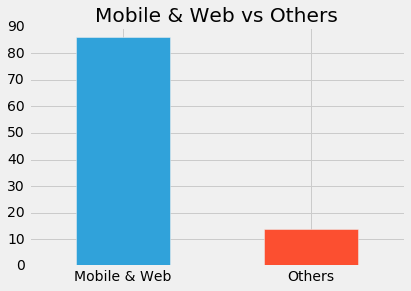

In [6]:
mobile_web = jobs_clean.str.contains('Web Developer|Mobile Developer')
mw =mobile_web.value_counts(normalize = True)*100

%matplotlib inline 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

mw.plot.bar()
plt.title('Mobile & Web vs Others')
plt.xticks([0,1],['Mobile & Web', 'Others'], rotation=0)
plt.show()

## New Coders - Locations and Densities

Now that we have determined that the sample is representative, we can start finding out hwere these new coders are located, and what the densities are per location.

In [21]:
clean_survey = survey.dropna(subset=['JobRoleInterest'])
absolute  = clean_survey['CountryLive'].value_counts()
relative = clean_survey['CountryLive'].value_counts(normalize=True)*100

table = pd.concat([absolute,relative], axis = 'columns')
table.columns = ['Absolute', 'Relative']
table

#We would choose to advertise in both the United States of America and India. 

,Absolute,Relative
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


## Understanding Where People would Spend Money for Learning

In [23]:
cities = clean_survey[(clean_survey['CountryLive']=='United States of America')
                      |(clean_survey['CountryLive']=='India')
                      |(clean_survey['CountryLive']=='United Kingdom')
                      |(clean_survey['CountryLive']=='Canada')
                      ]
cities['TotalSpent'] = cities['MoneyForLearning']/cities['MonthsProgramming'].apply(lambda x:1 if x==0 else x)
cities['n_MonthsProgramming'] = cities['MonthsProgramming'].apply(lambda x:1 if x==0 else x)
cities.loc[:,['n_MonthsProgramming','MonthsProgramming','TotalSpent']]

cities_2 = cities[cities['TotalSpent'].notnull()]
cities_2

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,TotalSpent,n_MonthsProgramming
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333,6.0
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000,5.0
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,12.0
15,32.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.0
16,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,16.666667,12.0
18,46.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.714286,14.0
19,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.857143,28.0
21,23.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,3.0
22,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,285.714286,14.0
23,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,100.000000,2.0


In [38]:
cities_3 = cities_2.groupby('CountryLive').mean()
cities_3['TotalSpent'].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: TotalSpent, dtype: float64

The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

## Dealing with Extreme Outliers 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


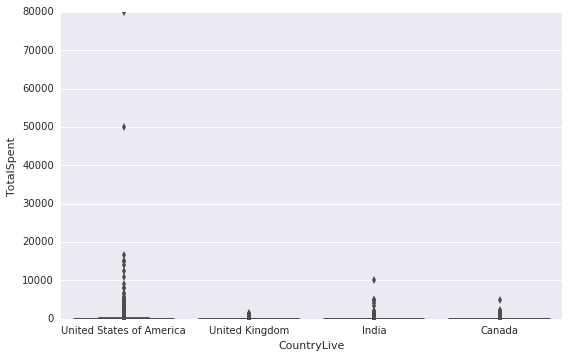

In [55]:
import seaborn as sns
sns.boxplot(x='CountryLive', y='TotalSpent', data=cities_2)

#It appears that the United states has some outliers.

cities_5 = cities_2[cities_2['TotalSpent']<20000]

## Recomputing Mean Total Spent

In [59]:
no_outliers = cities_5.groupby('CountryLive').mean()
no_outliers['TotalSpent']

#After removing the outliers, we can see that the United States of America is still
#the best market to advertise, we would have to explore more on India. 


CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: TotalSpent, dtype: float64

## Conclusion

In this project we have cleaned and explored the dataset for freeCodeCamp, we have found that advertising in the US market is a good idea. But we still need to do more analysis to find out what the second best market is. 